## Problem Statement
Congratulations – you have been hired as Chief Data Scientist of MedCamp – a not for profit organization dedicated in making health conditions for **working professionals** better. MedCamp was started because the founders saw their family suffer due to bad work life balance and neglected health.

MedCamp organizes health camps in several cities with low work life balance. They reach out to working people and ask them to register for these health camps. For those who attend, MedCamp provides them facility to undergo health checks or increase awareness by visiting various stalls (depending on the format of camp). 

MedCamp has conducted 65 such events over a period of 4 years and they see a high drop off between “Registration” and Number of people taking tests at the Camps. In last 4 years, they have stored data of ~110,000 registrations they have done.

One of the huge costs in arranging these camps is the amount of inventory you need to carry. If you carry more than required inventory, you incur unnecessarily high costs. On the other hand, if you carry less than required inventory for conducting these medical checks, people end up having bad experience

### Process
MedCamp employees / volunteers reach out to people and drive registrations.

During the camp, People who “ShowUp” either undergo the medical tests or visit stalls depending on the format of health camp

### Outcome
For the first 2 formats, a favourable outcome is defined as getting a health_score, while in the third format it is defined as visiting at least a stall.
You need to predict the chances (probability) of having a favourable outcome.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data_dict=pd.read_excel(r"E:\EDA upload\Data_Dictionary.xlsx")
train=pd.read_csv(r"E:\EDA upload\Train.csv")
fhc=pd.read_csv(r"E:\EDA upload\First_Health_Camp_Attended.csv")
shc=pd.read_csv(r"E:\EDA upload\Second_Health_Camp_Attended.csv")
thc=pd.read_csv(r"E:\EDA upload\Third_Health_Camp_Attended.csv")
hc=pd.read_csv(r"E:\EDA upload\Health_Camp_Detail.csv")
pp=pd.read_csv(r"E:\EDA upload\Patient_Profile.csv")
test=pd.read_csv(r"E:\test_l0Auv8Q.csv")
submission=pd.read_csv(r"C:\Users\gunja\Downloads\sample_submmission.csv")

In [24]:
data_dict.T

,0,1,2,3,4,5,6
Details of the Files,Health_Camp_Detail.csv – File containing Healt...,Train.csv – File containing registration detai...,Patient_Profile.csv – This file contains Patie...,First_Health_Camp_Attended.csv – This file con...,Second_Health_Camp_Attended.csv - This file co...,Third_Health_Camp_Attended.csv - This file con...,Test.csv – File containing registration detail...


In [3]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [4]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [5]:
train.shape, test.shape

((75278, 8), (35249, 8))

In [6]:
fhc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score',
       'Unnamed: 4'],
      dtype='object')

In [7]:
shc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Health Score'], dtype='object')

In [8]:
thc.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited',
       'Last_Stall_Visited_Number'],
      dtype='object')

In [9]:
pp.columns  # target the customers through social media

Index(['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared',
       'Facebook_Shared', 'Income', 'Education_Score', 'Age',
       'First_Interaction', 'City_Type', 'Employer_Category'],
      dtype='object')

In [10]:
hc.columns

Index(['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'Category1',
       'Category2', 'Category3'],
      dtype='object')

In [11]:
# combine the train and test
combined=pd.concat([train,test],ignore_index=True)

In [12]:
combined.shape,train.shape,test.shape

((110527, 8), (75278, 8), (35249, 8))

In [13]:
# lets join patient profile to the combined dataset
combined=pd.merge(combined,pp,on=['Patient_ID'],how='left')
combined.shape

(110527, 18)

In [14]:
combined=pd.merge(combined,fhc,on=['Patient_ID','Health_Camp_ID'],how='left')
combined=pd.merge(combined,shc,on=['Patient_ID','Health_Camp_ID'],how='left')
combined=pd.merge(combined,thc,on=['Patient_ID','Health_Camp_ID'],how='left')

In [15]:
combined.shape, fhc.shape, shc.shape, thc.shape

((110527, 24), (6218, 5), (7819, 3), (6515, 4))

In [18]:
# healthcare detail
combined=pd.merge(combined,hc,on=['Health_Camp_ID'],how='left')
combined.shape

(110527, 29)

In [21]:
del pp, fhc, shc, hc

In [22]:
combined.isnull().mean()*100

Patient_ID                     0.000000
Health_Camp_ID                 0.000000
Registration_Date              0.302189
Var1                           0.000000
Var2                           0.000000
Var3                           0.000000
Var4                           0.000000
Var5                           0.000000
Online_Follower                0.000000
LinkedIn_Shared                0.000000
Twitter_Shared                 0.000000
Facebook_Shared                0.000000
Income                         0.000000
Education_Score                0.000000
Age                            0.000000
First_Interaction              0.000000
City_Type                     42.163453
Employer_Category             82.299348
Donation                      94.374225
Health_Score                  94.374225
Unnamed: 4                   100.000000
Health Score                  92.925710
Number_of_stall_visited       94.105513
Last_Stall_Visited_Number     94.105513
Camp_Start_Date                0.000000


In [23]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,10-Sep-05,4,0,0,0,2,0,0,0,0,None,None,None,06-Dec-04,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,18-Aug-05,45,5,0,0,7,0,0,0,0,1,75,40,08-Sep-04,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,29-Apr-06,0,0,0,0,0,0,0,0,0,None,None,None,22-Jun-04,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,07-Feb-04,0,0,0,0,0,0,0,0,0,None,None,None,07-Feb-04,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,28-Feb-06,15,1,0,0,7,0,0,0,1,1,70,40,04-Jul-03,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,30-Mar-06,03-Apr-06,Second,A,2


In [26]:
combined['Social_Media']=combined.Online_Follower+combined.LinkedIn_Shared+combined.Twitter_Shared+combined.Facebook_Shared
combined.tail(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media
110525,502444,6567,13-Jan-07,0,0,0,0,0,0,0,0,0,None,None,None,04-May-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-Jan-07,04-Feb-07,Second,D,2,0
110526,523811,6584,16-Jun-06,4,3,0,2,4,0,0,0,0,1,69,44,05-Aug-04,D,Telecom,NaN,NaN,NaN,NaN,NaN,NaN,04-Aug-06,09-Aug-06,Second,A,2,0


In [27]:
combined['Social_Media'].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [29]:
# registration date
combined['Registration_Date']=pd.to_datetime(combined.Registration_Date,dayfirst=True)
combined['First_Interaction']=pd.to_datetime(combined.First_Interaction,dayfirst=True)
combined['Camp_Start_Date']=pd.to_datetime(combined.Camp_Start_Date,dayfirst=True)
combined['Camp_End_Date']=pd.to_datetime(combined.Camp_End_Date,dayfirst=True)

In [31]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Patient_ID                 110527 non-null  int64         
 1   Health_Camp_ID             110527 non-null  int64         
 2   Registration_Date          110193 non-null  datetime64[ns]
 3   Var1                       110527 non-null  int64         
 4   Var2                       110527 non-null  int64         
 5   Var3                       110527 non-null  int64         
 6   Var4                       110527 non-null  int64         
 7   Var5                       110527 non-null  int64         
 8   Online_Follower            110527 non-null  int64         
 9   LinkedIn_Shared            110527 non-null  int64         
 10  Twitter_Shared             110527 non-null  int64         
 11  Facebook_Shared            110527 non-null  int64   

In [32]:
# diff in interaction days
combined['Interaction_Days']=combined.Registration_Date-combined.First_Interaction

In [33]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278 days
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344 days


In [34]:
# remove days from the new variable created
combined['Interaction_Days']=combined.Interaction_Days.dt.days

In [36]:
combined['Camp_Duration']=combined.Camp_End_Date-combined.Camp_Start_Date

In [37]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59 days
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59 days
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751 days
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17 days
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4 days


In [38]:
combined['Camp_Duration']=combined['Camp_Duration'].dt.days

In [40]:
# start date - reg date
combined['magic1']=abs((combined.Camp_Start_Date-combined.Registration_Date).dt.days)
# end date - reg date
combined['magic2']=abs((combined.Camp_End_Date-combined.Registration_Date).dt.days)
# end date - first interaction
combined['Patient_Duration']=abs((combined.Camp_End_Date-combined.First_Interaction).dt.days)

In [41]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004


In [44]:
# first interaction
# registration happens
# camp is organised
# person comes and goes into the health camp
# gets the health score else stall visit

## first interaction >> registration date >> camp date

# cap end date >> camp start date >> registration date

In [45]:
def dates_between(start,reg,end):
    if(end>start>reg):
        return 1
    else:
        return 0

In [46]:
# apply the func
combined['dates_seq']=combined.apply(lambda x:dates_between(x['Camp_Start_Date'],x['Registration_Date'],x['Camp_End_Date']),axis=1)

In [47]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1


In [49]:
combined['Registration_Days']=combined.Registration_Date.dt.day
combined['Registration_Month']=combined.Registration_Date.dt.month
combined['Registration_Year']=combined.Registration_Date.dt.year

In [50]:
#camp start date and end date
combined['Camp_Start_Year']=combined.Camp_Start_Date.dt.year
combined['Camp_End_Year']=combined.Camp_End_Date.dt.year
combined['First_Int_Year']=combined.First_Interaction.dt.year

In [51]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2005,2007,2004
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0,7.0,2.0,2004.0,2004,2004,2004
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1,28.0,2.0,2006.0,2006,2006,2003


In [55]:
# the no. of patients per day
combined['Patients_Per_Day']=combined.groupby('Registration_Days')['Patient_ID'].transform('nunique')

In [52]:
# the no. of patients per month
combined['Patients_Per_Month']=combined.groupby('Registration_Month')['Patient_ID'].transform('nunique')

In [53]:
# the no. of patients per year
combined['Patients_Per_Year']=combined.groupby('Registration_Year')['Patient_ID'].transform('nunique')

In [56]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Month,Patients_Per_Year,Patients_Per_Day
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,6585.0,15710.0,2649.0
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,5804.0,15710.0,3620.0
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2005,2007,2004,4785.0,19318.0,2518.0
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0,7.0,2.0,2004.0,2004,2004,2004,5029.0,9646.0,2363.0
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1,28.0,2.0,2006.0,2006,2006,2003,5029.0,19318.0,3012.0


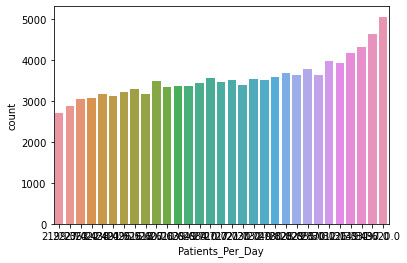

In [58]:
sns.countplot(combined.Patients_Per_Day)
plt.show()

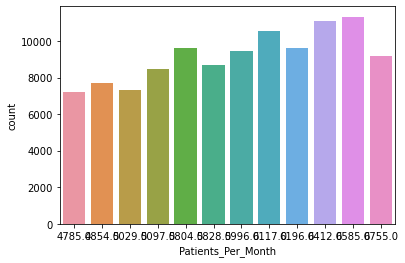

In [59]:
sns.countplot(combined.Patients_Per_Month)
plt.show()

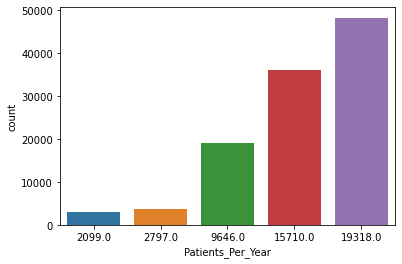

In [60]:
sns.countplot(combined.Patients_Per_Year)
plt.show()

In [62]:
# frequency of patients id
combined['Patients_Freq_Per_Day']=combined.groupby('Patient_ID')['Registration_Days'].transform('nunique')
combined['Patients_Freq_Per_Month']=combined.groupby('Patient_ID')['Registration_Month'].transform('nunique')
combined['Patients_Freq_Per_Year']=combined.groupby('Patient_ID')['Registration_Year'].transform('nunique')

In [63]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Month,Patients_Per_Year,Patients_Per_Day,Patients_Freq_Per_Day,Patients_Freq_Per_Month,Patients_Freq_Per_Year
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,6585.0,15710.0,2649.0,9,7,3
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,5804.0,15710.0,3620.0,16,12,4
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2005,2007,2004,4785.0,19318.0,2518.0,5,4,2
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0,7.0,2.0,2004.0,2004,2004,2004,5029.0,9646.0,2363.0,4,4,3
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1,28.0,2.0,2006.0,2006,2006,2003,5029.0,19318.0,3012.0,17,9,4


In [64]:
combined['Patients_Freq_HC']=combined.groupby('Health_Camp_ID')['Patient_ID'].transform('nunique')
# no. of patients in health camps

In [67]:
# no. of health camps
mapp=combined.Health_Camp_ID.value_counts().to_dict()
del mapp

In [68]:
combined['Health_Camps_Year']=combined.groupby('Camp_End_Year')['Health_Camp_ID'].transform('nunique')

In [69]:
combined.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Month,Patients_Per_Year,Patients_Per_Day,Patients_Freq_Per_Day,Patients_Freq_Per_Month,Patients_Freq_Per_Year,Patients_Freq_HC,Health_Camps_Year
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,6585.0,15710.0,2649.0,9,7,3,2837,19
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,5804.0,15710.0,3620.0,16,12,4,2837,19
2,523729,6534,2006-04-29,0,0,0,0,0,0,0,0,0,None,None,None,2004-06-22,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,2005-10-17,2007-11-07,Second,A,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2005,2007,2004,4785.0,19318.0,2518.0,5,4,2,3597,9
3,524931,6535,2004-02-07,0,0,0,0,0,0,0,0,0,None,None,None,2004-02-07,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-02-01,2004-02-18,First,E,2,0,0.0,17,6.0,11.0,11,0,7.0,2.0,2004.0,2004,2004,2004,5029.0,9646.0,2363.0,4,4,3,1882,14
4,521364,6529,2006-02-28,15,1,0,0,7,0,0,0,1,1,70,40,2003-07-04,I,Technology,NaN,NaN,NaN,0.845597,NaN,NaN,2006-03-30,2006-04-03,Second,A,2,1,970.0,4,30.0,34.0,1004,1,28.0,2.0,2006.0,2006,2006,2003,5029.0,19318.0,3012.0,17,9,4,3823,18


In [71]:
combined.groupby('Camp_End_Year')['Health_Camp_ID'].nunique()

Camp_End_Year
2003     5
2004    14
2005    19
2006    18
2007     9
Name: Health_Camp_ID, dtype: int64

In [72]:
combined.loc[combined.Patient_ID==489652].head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Month,Patients_Per_Year,Patients_Per_Day,Patients_Freq_Per_Day,Patients_Freq_Per_Month,Patients_Freq_Per_Year,Patients_Freq_HC,Health_Camps_Year
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,6585.0,15710.0,2649.0,9,7,3,2837,19
622,489652,6532,2005-03-15,0,0,0,0,0,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-02-19,2005-08-23,First,F,2,0,99.0,185,24.0,161.0,260,0,15.0,3.0,2005.0,2005,2005,2004,4854.0,15710.0,2721.0,9,7,3,1993,19
1973,489652,6543,2005-11-26,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-09-27,2007-11-07,First,F,2,0,355.0,771,60.0,711.0,1066,0,26.0,11.0,2005.0,2005,2007,2004,5828.0,15710.0,2749.0,9,7,3,6543,9
12265,489652,6580,2004-12-18,0,0,0,0,0,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004-12-22,2005-01-06,First,E,2,0,12.0,15,4.0,19.0,31,1,18.0,12.0,2004.0,2004,2005,2004,6196.0,9646.0,3620.0,9,7,3,3517,19
20838,489652,6570,2005-05-01,0,0,0,0,0,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005-07-09,2005-07-22,First,E,2,0,146.0,13,69.0,82.0,228,1,1.0,5.0,2005.0,2005,2005,2004,6117.0,15710.0,2870.0,9,7,3,3564,19


In [73]:
# if the health score >0 or health score>0 or no. of stall visited>0
# return 1 else 0
def tgt(hs,hs_,stall_visit,stall_no):
    if((hs>0) or (hs_>0) or (stall_visit>0) or (stall_no>0)):
        return(1)
    else:
        return(0)

In [75]:
combined['Target']=combined.apply(lambda x:tgt(x['Health Score'],
                           x['Health_Score'],
                           x['Number_of_stall_visited'],
                           x['Last_Stall_Visited_Number']),axis=1)

In [77]:
# check the count of target
combined.Target.value_counts()

0    89993
1    20534
Name: Target, dtype: int64

In [78]:
combined.head(2)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Month,Patients_Per_Year,Patients_Per_Day,Patients_Freq_Per_Day,Patients_Freq_Per_Month,Patients_Freq_Per_Year,Patients_Freq_HC,Health_Camps_Year,Target
0,489652,6578,2005-09-10,4,0,0,0,2,0,0,0,0,None,None,None,2004-12-06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,2005-08-16,2005-10-14,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,6585.0,15710.0,2649.0,9,7,3,2837,19,1
1,507246,6578,2005-08-18,45,5,0,0,7,0,0,0,0,1,75,40,2004-09-08,C,Others,NaN,NaN,NaN,NaN,NaN,NaN,2005-08-16,2005-10-14,Third,G,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,5804.0,15710.0,3620.0,16,12,4,2837,19,0


In [79]:
# drop the columns
newdata=combined.drop(['Patient_ID','Health_Camp_ID','Registration_Date','Online_Follower','LinkedIn_Shared','Twitter_Shared',
              'Facebook_Shared','First_Interaction','Unnamed: 4','Camp_Start_Date','Camp_End_Date'],axis=1)        

In [81]:
newdata.head()

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Donation,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Month,Patients_Per_Year,Patients_Per_Day,Patients_Freq_Per_Day,Patients_Freq_Per_Month,Patients_Freq_Per_Year,Patients_Freq_HC,Health_Camps_Year,Target
0,4,0,0,0,2,None,None,None,NaN,NaN,NaN,NaN,NaN,2.0,1.0,Third,G,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,6585.0,15710.0,2649.0,9,7,3,2837,19,1
1,45,5,0,0,7,1,75,40,C,Others,NaN,NaN,NaN,NaN,NaN,Third,G,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,5804.0,15710.0,3620.0,16,12,4,2837,19,0
2,0,0,0,0,0,None,None,None,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,Second,A,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2005,2007,2004,4785.0,19318.0,2518.0,5,4,2,3597,9,1
3,0,0,0,0,0,None,None,None,I,NaN,NaN,NaN,NaN,NaN,NaN,First,E,2,0,0.0,17,6.0,11.0,11,0,7.0,2.0,2004.0,2004,2004,2004,5029.0,9646.0,2363.0,4,4,3,1882,14,0
4,15,1,0,0,7,1,70,40,I,Technology,NaN,NaN,0.845597,NaN,NaN,Second,A,2,1,970.0,4,30.0,34.0,1004,1,28.0,2.0,2006.0,2006,2006,2003,5029.0,19318.0,3012.0,17,9,4,3823,18,1


In [82]:
newdata.shape, combined.shape

((110527, 40), (110527, 51))

In [83]:
pd.factorize(newdata.City_Type)  # will generate a number for the alphabets

(array([-1,  0, -1, ...,  4, -1,  2], dtype=int64),
 Index(['C', 'I', 'D', 'B', 'A', 'E', 'G', 'H', 'F'], dtype='object'))

In [84]:
tbl=pd.crosstab(newdata.City_Type,newdata.Target)

import scipy.stats as stats
teststats, pvalue, df, exp_freq= stats.chi2_contingency(tbl)
print(pvalue)

1.136816151637158e-10


In [86]:
tbl=pd.crosstab(newdata.Education_Score,newdata.Target)

import scipy.stats as stats
teststats, pvalue, df, exp_freq= stats.chi2_contingency(tbl)
print(pvalue)

# edu score, empl cat and city cat are related with target

6.962654322064772e-171


In [87]:
tbl=pd.crosstab(newdata.Category2,newdata.Target)

import scipy.stats as stats
teststats, pvalue, df, exp_freq= stats.chi2_contingency(tbl)
print(pvalue)

0.0


In [89]:
# frequency encoding on category 1,2 and 3
newdata['Category1']=pd.factorize(newdata.Category1)[0]
newdata['Category2']=pd.factorize(newdata.Category2)[0]

In [90]:
newdata.Donation.describe()

count    6218.000000
mean       32.587649
std        24.501676
min        10.000000
25%        20.000000
50%        30.000000
75%        40.000000
max       330.000000
Name: Donation, dtype: float64

In [93]:
newdata.drop('Donation',axis=1,inplace=True) # drop the donation

In [95]:
# replace incomee, education and age by na.nan
newdata.replace(to_replace='None',value=np.NaN,inplace=True)

In [96]:
newdata.head()

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Health_Score,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Month,Patients_Per_Year,Patients_Per_Day,Patients_Freq_Per_Day,Patients_Freq_Per_Month,Patients_Freq_Per_Year,Patients_Freq_HC,Health_Camps_Year,Target
0,4,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,0,0,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,6585.0,15710.0,2649.0,9,7,3,2837,19,1
1,45,5,0,0,7,1,75,40,C,Others,NaN,NaN,NaN,NaN,0,0,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,5804.0,15710.0,3620.0,16,12,4,2837,19,0
2,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.402054,NaN,NaN,1,1,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2005,2007,2004,4785.0,19318.0,2518.0,5,4,2,3597,9,1
3,0,0,0,0,0,NaN,NaN,NaN,I,NaN,NaN,NaN,NaN,NaN,2,2,2,0,0.0,17,6.0,11.0,11,0,7.0,2.0,2004.0,2004,2004,2004,5029.0,9646.0,2363.0,4,4,3,1882,14,0
4,15,1,0,0,7,1,70,40,I,Technology,NaN,0.845597,NaN,NaN,1,1,2,1,970.0,4,30.0,34.0,1004,1,28.0,2.0,2006.0,2006,2006,2003,5029.0,19318.0,3012.0,17,9,4,3823,18,1


In [97]:
# drop the additional column
newdata.drop(['Health_Score','Health Score','Number_of_stall_visited','Last_Stall_Visited_Number'],axis=1,inplace=True)

In [99]:
newdata['Income']=pd.factorize(newdata.Income)[0]
newdata['Education_Score']=pd.factorize(newdata.Education_Score)[0]     
newdata['City_Type']=pd.factorize(newdata.City_Type)[0]
newdata['Employer_Category']=pd.factorize(newdata.Employer_Category)[0]

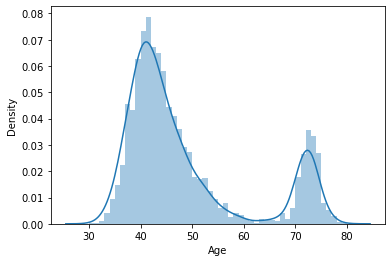

In [103]:
# tip: use Kbins Discretizer to deal with numerical data:
sns.distplot(newdata.Age)
plt.show()

In [105]:
newdata.Age=newdata.Age.astype('float')

In [106]:
newdata.Age.describe()

count    32602.000000
mean        48.208760
std         11.969104
min         30.000000
25%         40.000000
50%         44.000000
75%         51.000000
max         80.000000
Name: Age, dtype: float64

In [107]:
newdata['Age']=pd.factorize(newdata.Age)[0]

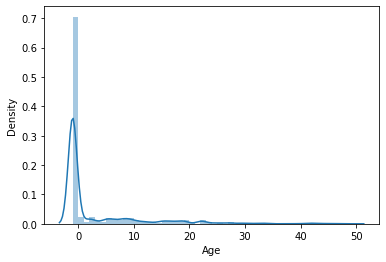

In [109]:
sns.distplot(newdata.Age)
plt.show()

In [110]:
newdata.head()

,Var1,Var2,Var3,Var4,Var5,Income,Education_Score,Age,City_Type,Employer_Category,Category1,Category2,Category3,Social_Media,Interaction_Days,Camp_Duration,magic1,magic2,Patient_Duration,dates_seq,Registration_Days,Registration_Month,Registration_Year,Camp_Start_Year,Camp_End_Year,First_Int_Year,Patients_Per_Month,Patients_Per_Year,Patients_Per_Day,Patients_Freq_Per_Day,Patients_Freq_Per_Month,Patients_Freq_Per_Year,Patients_Freq_HC,Health_Camps_Year,Target
0,4,0,0,0,2,-1,-1,-1,-1,-1,0,0,2,0,278.0,59,25.0,34.0,312,0,10.0,9.0,2005.0,2005,2005,2004,6585.0,15710.0,2649.0,9,7,3,2837,19,1
1,45,5,0,0,7,0,0,0,0,0,0,0,2,0,344.0,59,2.0,57.0,401,0,18.0,8.0,2005.0,2005,2005,2004,5804.0,15710.0,3620.0,16,12,4,2837,19,0
2,0,0,0,0,0,-1,-1,-1,-1,-1,1,1,2,0,676.0,751,194.0,557.0,1233,0,29.0,4.0,2006.0,2005,2007,2004,4785.0,19318.0,2518.0,5,4,2,3597,9,1
3,0,0,0,0,0,-1,-1,-1,1,-1,2,2,2,0,0.0,17,6.0,11.0,11,0,7.0,2.0,2004.0,2004,2004,2004,5029.0,9646.0,2363.0,4,4,3,1882,14,0
4,15,1,0,0,7,0,1,0,1,1,1,1,2,1,970.0,4,30.0,34.0,1004,1,28.0,2.0,2006.0,2006,2006,2003,5029.0,19318.0,3012.0,17,9,4,3823,18,1


In [111]:
cols=['Interaction_Days','magic1','magic2','Registration_Days','Registration_Month','Registration_Year','Patients_Per_Day',
     'Patients_Per_Month','Patients_Per_Year']

for i in cols:
    newdata.loc[:,i].fillna(newdata.loc[:,i].median(),inplace=True)

In [112]:
newdata.isnull().sum()

Var1                       0
Var2                       0
Var3                       0
Var4                       0
Var5                       0
Income                     0
Education_Score            0
Age                        0
City_Type                  0
Employer_Category          0
Category1                  0
Category2                  0
Category3                  0
Social_Media               0
Interaction_Days           0
Camp_Duration              0
magic1                     0
magic2                     0
Patient_Duration           0
dates_seq                  0
Registration_Days          0
Registration_Month         0
Registration_Year          0
Camp_Start_Year            0
Camp_End_Year              0
First_Int_Year             0
Patients_Per_Month         0
Patients_Per_Year          0
Patients_Per_Day           0
Patients_Freq_Per_Day      0
Patients_Freq_Per_Month    0
Patients_Freq_Per_Year     0
Patients_Freq_HC           0
Health_Camps_Year          0
Target        

## Modelling

In [113]:
# split the data in train and test
train.shape, test.shape

((75278, 8), (35249, 8))

In [114]:
newtrain=newdata.loc[0:train.shape[0]-1,:]
newtest=newdata.loc[train.shape[0]:,:]

In [115]:
# drop the target from train and test
X= newtrain.drop('Target',axis=1)
newtest=newtest.drop('Target',axis=1)
y=newtrain.Target

In [116]:
# import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [118]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [123]:
# define the base models
def base_models():
    models=dict()
    models['lg']=LogisticRegression()
    models['tree']=DecisionTreeClassifier(criterion='entropy')
    models['rf']=RandomForestClassifier(criterion='entropy')
    models['gbm']=GradientBoostingClassifier()
    models['xgb']=XGBClassifier()
    models['lgbm']=LGBMClassifier()
    models['catboost']=CatBoostClassifier()    
    return models

In [124]:
# evaluation function
# from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

def eval_score(model):
    cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
    score=cross_val_score(model,X,y,scoring='roc_auc',
                          cv=cv,
                          error_score='raise',
                          n_jobs=-1)
    return score

In [125]:
# build models
models=base_models()
result,names=list(),list()
for name,model in models.items():
    finalscore=eval_score(model)
    result.append(finalscore)
    names.append(name)
    print('%s %.3f (%.3f)'%(name,np.mean(result),np.std(result)))

lg 0.700 (0.005)
tree 0.718 (0.019)
rf 0.775 (0.082)
gbm 0.797 (0.081)
xgb 0.814 (0.079)
lgbm 0.824 (0.076)
catboost 0.832 (0.073)


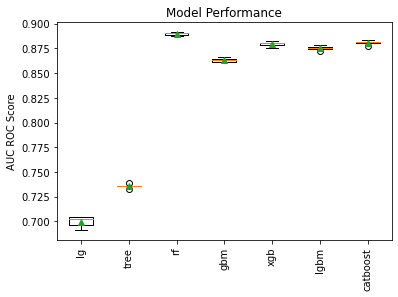

In [140]:
plt.boxplot(result,labels=names,showmeans=True)
plt.xticks(rotation=90)
plt.ylabel('AUC ROC Score')
plt.title('Model Performance')
plt.show()

In [127]:
xgb=XGBClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_xgb=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_xgb.append(xgb.fit(xtrain,ytrain).predict_proba(newtest))

In [129]:
# generate the predicted values
pd.DataFrame(np.array(pred_xgb)[0])[1]

0        0.366786
1        0.455960
2        0.137294
3        0.559937
4        0.065062
5        0.725858
6        0.748393
7        0.693748
8        0.731638
9        0.125072
10       0.272328
11       0.124235
12       0.103648
13       0.048877
14       0.264823
15       0.507955
16       0.194652
17       0.121857
18       0.105544
19       0.269934
20       0.665914
21       0.093495
22       0.824769
23       0.396543
24       0.471517
25       0.177132
26       0.181000
27       0.479834
28       0.108937
29       0.018132
30       0.268477
31       0.540125
32       0.280792
33       0.771139
34       0.120610
35       0.714151
36       0.103973
37       0.381227
38       0.452806
39       0.223770
40       0.015239
41       0.344941
42       0.055701
43       0.023617
44       0.214250
45       0.260667
46       0.540082
47       0.732530
48       0.023617
49       0.091056
50       0.420579
51       0.763372
52       0.940364
53       0.101448
54       0.741690
55       0

In [130]:
submission['Outcome']=pd.DataFrame(np.array(pred_xgb)[0])[1]

In [135]:
submission.to_csv('XBGModel_health.csv',index=False)

In [132]:
lgbm=LGBMClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_lgbm=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lgbm.append(lgbm.fit(xtrain,ytrain).predict_proba(newtest))

In [133]:
submission['Outcome']=pd.DataFrame(np.array(pred_lgbm)[0])[1]

In [134]:
cboost=CatBoostClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_cboost=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_cboost.append(cboost.fit(xtrain,ytrain).predict_proba(newtest))

submission['Outcome']=pd.DataFrame(np.array(pred_cboost)[0])[1]

Learning rate set to 0.059277
0:	learn: 0.6562126	total: 177ms	remaining: 2m 56s
1:	learn: 0.6232079	total: 206ms	remaining: 1m 42s
2:	learn: 0.5945482	total: 234ms	remaining: 1m 17s
3:	learn: 0.5709994	total: 252ms	remaining: 1m 2s
4:	learn: 0.5505476	total: 269ms	remaining: 53.6s
5:	learn: 0.5343094	total: 286ms	remaining: 47.5s
6:	learn: 0.5195475	total: 305ms	remaining: 43.2s
7:	learn: 0.5053246	total: 325ms	remaining: 40.2s
8:	learn: 0.4941594	total: 339ms	remaining: 37.4s
9:	learn: 0.4838040	total: 354ms	remaining: 35s
10:	learn: 0.4755115	total: 368ms	remaining: 33.1s
11:	learn: 0.4680049	total: 382ms	remaining: 31.5s
12:	learn: 0.4618678	total: 395ms	remaining: 30s
13:	learn: 0.4561301	total: 410ms	remaining: 28.9s
14:	learn: 0.4511812	total: 428ms	remaining: 28.1s
15:	learn: 0.4464484	total: 440ms	remaining: 27.1s
16:	learn: 0.4427252	total: 453ms	remaining: 26.2s
17:	learn: 0.4387471	total: 465ms	remaining: 25.4s
18:	learn: 0.4353954	total: 478ms	remaining: 24.7s
19:	learn: 0

164:	learn: 0.3862260	total: 2.46s	remaining: 12.5s
165:	learn: 0.3860962	total: 2.48s	remaining: 12.5s
166:	learn: 0.3859971	total: 2.5s	remaining: 12.5s
167:	learn: 0.3858663	total: 2.52s	remaining: 12.5s
168:	learn: 0.3857460	total: 2.53s	remaining: 12.4s
169:	learn: 0.3856134	total: 2.55s	remaining: 12.4s
170:	learn: 0.3855035	total: 2.56s	remaining: 12.4s
171:	learn: 0.3854112	total: 2.58s	remaining: 12.4s
172:	learn: 0.3853140	total: 2.6s	remaining: 12.4s
173:	learn: 0.3851770	total: 2.61s	remaining: 12.4s
174:	learn: 0.3850470	total: 2.63s	remaining: 12.4s
175:	learn: 0.3849488	total: 2.65s	remaining: 12.4s
176:	learn: 0.3848668	total: 2.66s	remaining: 12.4s
177:	learn: 0.3847527	total: 2.68s	remaining: 12.4s
178:	learn: 0.3846442	total: 2.7s	remaining: 12.4s
179:	learn: 0.3845414	total: 2.72s	remaining: 12.4s
180:	learn: 0.3844372	total: 2.73s	remaining: 12.4s
181:	learn: 0.3843427	total: 2.75s	remaining: 12.4s
182:	learn: 0.3842033	total: 2.76s	remaining: 12.3s
183:	learn: 0.3

324:	learn: 0.3696104	total: 4.62s	remaining: 9.6s
325:	learn: 0.3695852	total: 4.63s	remaining: 9.58s
326:	learn: 0.3694719	total: 4.65s	remaining: 9.56s
327:	learn: 0.3693364	total: 4.66s	remaining: 9.54s
328:	learn: 0.3692474	total: 4.67s	remaining: 9.52s
329:	learn: 0.3691800	total: 4.68s	remaining: 9.5s
330:	learn: 0.3690736	total: 4.69s	remaining: 9.49s
331:	learn: 0.3689618	total: 4.71s	remaining: 9.47s
332:	learn: 0.3688724	total: 4.72s	remaining: 9.45s
333:	learn: 0.3687568	total: 4.73s	remaining: 9.44s
334:	learn: 0.3686631	total: 4.75s	remaining: 9.42s
335:	learn: 0.3686003	total: 4.76s	remaining: 9.41s
336:	learn: 0.3685383	total: 4.78s	remaining: 9.4s
337:	learn: 0.3684859	total: 4.79s	remaining: 9.38s
338:	learn: 0.3683353	total: 4.8s	remaining: 9.36s
339:	learn: 0.3682108	total: 4.81s	remaining: 9.34s
340:	learn: 0.3681392	total: 4.82s	remaining: 9.32s
341:	learn: 0.3681032	total: 4.83s	remaining: 9.3s
342:	learn: 0.3680353	total: 4.85s	remaining: 9.28s
343:	learn: 0.367

497:	learn: 0.3553743	total: 6.83s	remaining: 6.89s
498:	learn: 0.3553099	total: 6.85s	remaining: 6.87s
499:	learn: 0.3552407	total: 6.86s	remaining: 6.86s
500:	learn: 0.3551071	total: 6.87s	remaining: 6.85s
501:	learn: 0.3550734	total: 6.88s	remaining: 6.83s
502:	learn: 0.3550185	total: 6.89s	remaining: 6.81s
503:	learn: 0.3549486	total: 6.91s	remaining: 6.8s
504:	learn: 0.3548705	total: 6.92s	remaining: 6.78s
505:	learn: 0.3547690	total: 6.93s	remaining: 6.76s
506:	learn: 0.3547002	total: 6.94s	remaining: 6.75s
507:	learn: 0.3546401	total: 6.95s	remaining: 6.73s
508:	learn: 0.3545713	total: 6.96s	remaining: 6.71s
509:	learn: 0.3545113	total: 6.97s	remaining: 6.7s
510:	learn: 0.3544422	total: 6.98s	remaining: 6.68s
511:	learn: 0.3543896	total: 6.99s	remaining: 6.67s
512:	learn: 0.3543429	total: 7s	remaining: 6.65s
513:	learn: 0.3542480	total: 7.02s	remaining: 6.63s
514:	learn: 0.3541878	total: 7.03s	remaining: 6.62s
515:	learn: 0.3541182	total: 7.04s	remaining: 6.61s
516:	learn: 0.354

661:	learn: 0.3445628	total: 8.84s	remaining: 4.51s
662:	learn: 0.3444778	total: 8.86s	remaining: 4.5s
663:	learn: 0.3443833	total: 8.87s	remaining: 4.49s
664:	learn: 0.3443016	total: 8.88s	remaining: 4.47s
665:	learn: 0.3442740	total: 8.89s	remaining: 4.46s
666:	learn: 0.3442188	total: 8.9s	remaining: 4.45s
667:	learn: 0.3441670	total: 8.92s	remaining: 4.43s
668:	learn: 0.3441312	total: 8.93s	remaining: 4.42s
669:	learn: 0.3440451	total: 8.95s	remaining: 4.41s
670:	learn: 0.3439799	total: 8.96s	remaining: 4.39s
671:	learn: 0.3439073	total: 8.97s	remaining: 4.38s
672:	learn: 0.3438534	total: 8.98s	remaining: 4.36s
673:	learn: 0.3438139	total: 8.99s	remaining: 4.35s
674:	learn: 0.3437403	total: 9.01s	remaining: 4.34s
675:	learn: 0.3436570	total: 9.02s	remaining: 4.32s
676:	learn: 0.3435804	total: 9.03s	remaining: 4.31s
677:	learn: 0.3435075	total: 9.04s	remaining: 4.29s
678:	learn: 0.3434359	total: 9.06s	remaining: 4.28s
679:	learn: 0.3433400	total: 9.07s	remaining: 4.27s
680:	learn: 0.

831:	learn: 0.3346193	total: 10.9s	remaining: 2.2s
832:	learn: 0.3345401	total: 10.9s	remaining: 2.18s
833:	learn: 0.3344782	total: 10.9s	remaining: 2.17s
834:	learn: 0.3344196	total: 10.9s	remaining: 2.16s
835:	learn: 0.3343567	total: 10.9s	remaining: 2.15s
836:	learn: 0.3342660	total: 10.9s	remaining: 2.13s
837:	learn: 0.3342070	total: 11s	remaining: 2.12s
838:	learn: 0.3341779	total: 11s	remaining: 2.1s
839:	learn: 0.3340908	total: 11s	remaining: 2.09s
840:	learn: 0.3340625	total: 11s	remaining: 2.08s
841:	learn: 0.3339877	total: 11s	remaining: 2.06s
842:	learn: 0.3339483	total: 11s	remaining: 2.05s
843:	learn: 0.3338823	total: 11s	remaining: 2.04s
844:	learn: 0.3338123	total: 11s	remaining: 2.03s
845:	learn: 0.3337547	total: 11.1s	remaining: 2.01s
846:	learn: 0.3337074	total: 11.1s	remaining: 2s
847:	learn: 0.3336422	total: 11.1s	remaining: 1.99s
848:	learn: 0.3335572	total: 11.1s	remaining: 1.97s
849:	learn: 0.3334972	total: 11.1s	remaining: 1.96s
850:	learn: 0.3334305	total: 11.1

992:	learn: 0.3259268	total: 12.9s	remaining: 90.7ms
993:	learn: 0.3258834	total: 12.9s	remaining: 77.7ms
994:	learn: 0.3258303	total: 12.9s	remaining: 64.8ms
995:	learn: 0.3257934	total: 12.9s	remaining: 51.8ms
996:	learn: 0.3257462	total: 12.9s	remaining: 38.8ms
997:	learn: 0.3256849	total: 12.9s	remaining: 25.9ms
998:	learn: 0.3256282	total: 12.9s	remaining: 12.9ms
999:	learn: 0.3255727	total: 12.9s	remaining: 0us
Learning rate set to 0.059277
0:	learn: 0.6561567	total: 29.2ms	remaining: 29.2s
1:	learn: 0.6229071	total: 54.1ms	remaining: 27s
2:	learn: 0.5943826	total: 79ms	remaining: 26.3s
3:	learn: 0.5719709	total: 104ms	remaining: 25.8s
4:	learn: 0.5515301	total: 124ms	remaining: 24.6s
5:	learn: 0.5334117	total: 144ms	remaining: 23.9s
6:	learn: 0.5187137	total: 162ms	remaining: 23s
7:	learn: 0.5046019	total: 179ms	remaining: 22.2s
8:	learn: 0.4944804	total: 195ms	remaining: 21.4s
9:	learn: 0.4853160	total: 210ms	remaining: 20.8s
10:	learn: 0.4770405	total: 225ms	remaining: 20.2s
1

164:	learn: 0.3856881	total: 2.25s	remaining: 11.4s
165:	learn: 0.3855201	total: 2.28s	remaining: 11.5s
166:	learn: 0.3854546	total: 2.3s	remaining: 11.5s
167:	learn: 0.3853445	total: 2.32s	remaining: 11.5s
168:	learn: 0.3852342	total: 2.33s	remaining: 11.5s
169:	learn: 0.3851272	total: 2.34s	remaining: 11.4s
170:	learn: 0.3849950	total: 2.36s	remaining: 11.4s
171:	learn: 0.3848852	total: 2.37s	remaining: 11.4s
172:	learn: 0.3847906	total: 2.38s	remaining: 11.4s
173:	learn: 0.3846960	total: 2.4s	remaining: 11.4s
174:	learn: 0.3846201	total: 2.41s	remaining: 11.4s
175:	learn: 0.3845311	total: 2.42s	remaining: 11.3s
176:	learn: 0.3844679	total: 2.44s	remaining: 11.3s
177:	learn: 0.3843838	total: 2.45s	remaining: 11.3s
178:	learn: 0.3842824	total: 2.47s	remaining: 11.3s
179:	learn: 0.3842247	total: 2.48s	remaining: 11.3s
180:	learn: 0.3841238	total: 2.49s	remaining: 11.3s
181:	learn: 0.3839831	total: 2.5s	remaining: 11.3s
182:	learn: 0.3838163	total: 2.52s	remaining: 11.2s
183:	learn: 0.3

330:	learn: 0.3681476	total: 5.08s	remaining: 10.3s
331:	learn: 0.3680487	total: 5.1s	remaining: 10.3s
332:	learn: 0.3679777	total: 5.13s	remaining: 10.3s
333:	learn: 0.3678677	total: 5.16s	remaining: 10.3s
334:	learn: 0.3677806	total: 5.17s	remaining: 10.3s
335:	learn: 0.3676831	total: 5.19s	remaining: 10.3s
336:	learn: 0.3676149	total: 5.21s	remaining: 10.2s
337:	learn: 0.3675163	total: 5.22s	remaining: 10.2s
338:	learn: 0.3674258	total: 5.25s	remaining: 10.2s
339:	learn: 0.3673352	total: 5.28s	remaining: 10.2s
340:	learn: 0.3672219	total: 5.3s	remaining: 10.2s
341:	learn: 0.3671229	total: 5.31s	remaining: 10.2s
342:	learn: 0.3670438	total: 5.34s	remaining: 10.2s
343:	learn: 0.3668738	total: 5.37s	remaining: 10.2s
344:	learn: 0.3668133	total: 5.39s	remaining: 10.2s
345:	learn: 0.3667354	total: 5.41s	remaining: 10.2s
346:	learn: 0.3666463	total: 5.43s	remaining: 10.2s
347:	learn: 0.3665428	total: 5.45s	remaining: 10.2s
348:	learn: 0.3664814	total: 5.47s	remaining: 10.2s
349:	learn: 0.

492:	learn: 0.3552234	total: 7.75s	remaining: 7.97s
493:	learn: 0.3551287	total: 7.77s	remaining: 7.95s
494:	learn: 0.3550572	total: 7.8s	remaining: 7.96s
495:	learn: 0.3549663	total: 7.82s	remaining: 7.94s
496:	learn: 0.3549005	total: 7.84s	remaining: 7.93s
497:	learn: 0.3548547	total: 7.86s	remaining: 7.92s
498:	learn: 0.3547758	total: 7.88s	remaining: 7.91s
499:	learn: 0.3547158	total: 7.89s	remaining: 7.89s
500:	learn: 0.3546855	total: 7.91s	remaining: 7.88s
501:	learn: 0.3546076	total: 7.93s	remaining: 7.87s
502:	learn: 0.3545381	total: 7.95s	remaining: 7.85s
503:	learn: 0.3544626	total: 7.97s	remaining: 7.85s
504:	learn: 0.3543985	total: 7.99s	remaining: 7.83s
505:	learn: 0.3543716	total: 8.01s	remaining: 7.82s
506:	learn: 0.3542779	total: 8.03s	remaining: 7.81s
507:	learn: 0.3542361	total: 8.05s	remaining: 7.79s
508:	learn: 0.3541662	total: 8.06s	remaining: 7.78s
509:	learn: 0.3541130	total: 8.09s	remaining: 7.77s
510:	learn: 0.3540215	total: 8.1s	remaining: 7.75s
511:	learn: 0.

657:	learn: 0.3438499	total: 10.4s	remaining: 5.42s
658:	learn: 0.3438042	total: 10.4s	remaining: 5.4s
659:	learn: 0.3437407	total: 10.5s	remaining: 5.38s
660:	learn: 0.3437016	total: 10.5s	remaining: 5.37s
661:	learn: 0.3436410	total: 10.5s	remaining: 5.35s
662:	learn: 0.3436023	total: 10.5s	remaining: 5.33s
663:	learn: 0.3435267	total: 10.5s	remaining: 5.31s
664:	learn: 0.3434529	total: 10.5s	remaining: 5.29s
665:	learn: 0.3433744	total: 10.5s	remaining: 5.28s
666:	learn: 0.3433229	total: 10.5s	remaining: 5.26s
667:	learn: 0.3432447	total: 10.6s	remaining: 5.24s
668:	learn: 0.3432154	total: 10.6s	remaining: 5.23s
669:	learn: 0.3431250	total: 10.6s	remaining: 5.21s
670:	learn: 0.3430585	total: 10.6s	remaining: 5.19s
671:	learn: 0.3430019	total: 10.6s	remaining: 5.18s
672:	learn: 0.3429261	total: 10.6s	remaining: 5.16s
673:	learn: 0.3429185	total: 10.6s	remaining: 5.14s
674:	learn: 0.3428137	total: 10.6s	remaining: 5.13s
675:	learn: 0.3427450	total: 10.7s	remaining: 5.11s
676:	learn: 0

825:	learn: 0.3336968	total: 12.7s	remaining: 2.67s
826:	learn: 0.3335925	total: 12.7s	remaining: 2.65s
827:	learn: 0.3334934	total: 12.7s	remaining: 2.64s
828:	learn: 0.3334399	total: 12.7s	remaining: 2.62s
829:	learn: 0.3333983	total: 12.7s	remaining: 2.6s
830:	learn: 0.3333321	total: 12.7s	remaining: 2.59s
831:	learn: 0.3332659	total: 12.7s	remaining: 2.57s
832:	learn: 0.3332015	total: 12.8s	remaining: 2.56s
833:	learn: 0.3331452	total: 12.8s	remaining: 2.54s
834:	learn: 0.3330797	total: 12.8s	remaining: 2.53s
835:	learn: 0.3330317	total: 12.8s	remaining: 2.51s
836:	learn: 0.3329969	total: 12.8s	remaining: 2.5s
837:	learn: 0.3329146	total: 12.8s	remaining: 2.48s
838:	learn: 0.3328594	total: 12.8s	remaining: 2.46s
839:	learn: 0.3327858	total: 12.8s	remaining: 2.45s
840:	learn: 0.3327434	total: 12.9s	remaining: 2.43s
841:	learn: 0.3326968	total: 12.9s	remaining: 2.42s
842:	learn: 0.3326565	total: 12.9s	remaining: 2.4s
843:	learn: 0.3326090	total: 12.9s	remaining: 2.38s
844:	learn: 0.3

987:	learn: 0.3247957	total: 14.7s	remaining: 178ms
988:	learn: 0.3247522	total: 14.7s	remaining: 164ms
989:	learn: 0.3247080	total: 14.7s	remaining: 149ms
990:	learn: 0.3246562	total: 14.7s	remaining: 134ms
991:	learn: 0.3246099	total: 14.7s	remaining: 119ms
992:	learn: 0.3245768	total: 14.8s	remaining: 104ms
993:	learn: 0.3245153	total: 14.8s	remaining: 89.1ms
994:	learn: 0.3244700	total: 14.8s	remaining: 74.3ms
995:	learn: 0.3244490	total: 14.8s	remaining: 59.4ms
996:	learn: 0.3244205	total: 14.8s	remaining: 44.6ms
997:	learn: 0.3243631	total: 14.8s	remaining: 29.7ms
998:	learn: 0.3242912	total: 14.8s	remaining: 14.8ms
999:	learn: 0.3242125	total: 14.8s	remaining: 0us
Learning rate set to 0.059277
0:	learn: 0.6566793	total: 26.8ms	remaining: 26.8s
1:	learn: 0.6242612	total: 52.7ms	remaining: 26.3s
2:	learn: 0.5955491	total: 82.4ms	remaining: 27.4s
3:	learn: 0.5719907	total: 106ms	remaining: 26.5s
4:	learn: 0.5521257	total: 129ms	remaining: 25.7s
5:	learn: 0.5340022	total: 150ms	rema

151:	learn: 0.3889745	total: 1.97s	remaining: 11s
152:	learn: 0.3887170	total: 1.99s	remaining: 11s
153:	learn: 0.3886258	total: 2s	remaining: 11s
154:	learn: 0.3885031	total: 2.01s	remaining: 11s
155:	learn: 0.3884173	total: 2.02s	remaining: 10.9s
156:	learn: 0.3883172	total: 2.04s	remaining: 10.9s
157:	learn: 0.3882621	total: 2.05s	remaining: 10.9s
158:	learn: 0.3881649	total: 2.06s	remaining: 10.9s
159:	learn: 0.3880393	total: 2.07s	remaining: 10.9s
160:	learn: 0.3879450	total: 2.08s	remaining: 10.9s
161:	learn: 0.3878248	total: 2.1s	remaining: 10.8s
162:	learn: 0.3877153	total: 2.11s	remaining: 10.8s
163:	learn: 0.3875796	total: 2.12s	remaining: 10.8s
164:	learn: 0.3875023	total: 2.13s	remaining: 10.8s
165:	learn: 0.3874249	total: 2.14s	remaining: 10.8s
166:	learn: 0.3872863	total: 2.15s	remaining: 10.7s
167:	learn: 0.3871767	total: 2.16s	remaining: 10.7s
168:	learn: 0.3870173	total: 2.18s	remaining: 10.7s
169:	learn: 0.3868609	total: 2.19s	remaining: 10.7s
170:	learn: 0.3867040	to

319:	learn: 0.3714268	total: 4.02s	remaining: 8.54s
320:	learn: 0.3713543	total: 4.04s	remaining: 8.54s
321:	learn: 0.3712794	total: 4.05s	remaining: 8.53s
322:	learn: 0.3712521	total: 4.06s	remaining: 8.51s
323:	learn: 0.3711321	total: 4.07s	remaining: 8.49s
324:	learn: 0.3710488	total: 4.08s	remaining: 8.48s
325:	learn: 0.3709222	total: 4.1s	remaining: 8.47s
326:	learn: 0.3708248	total: 4.11s	remaining: 8.45s
327:	learn: 0.3707686	total: 4.12s	remaining: 8.44s
328:	learn: 0.3706969	total: 4.13s	remaining: 8.43s
329:	learn: 0.3705784	total: 4.14s	remaining: 8.41s
330:	learn: 0.3704974	total: 4.16s	remaining: 8.4s
331:	learn: 0.3703775	total: 4.17s	remaining: 8.38s
332:	learn: 0.3702890	total: 4.18s	remaining: 8.37s
333:	learn: 0.3702584	total: 4.19s	remaining: 8.35s
334:	learn: 0.3701524	total: 4.2s	remaining: 8.34s
335:	learn: 0.3701339	total: 4.21s	remaining: 8.33s
336:	learn: 0.3700589	total: 4.23s	remaining: 8.32s
337:	learn: 0.3699689	total: 4.24s	remaining: 8.31s
338:	learn: 0.3

487:	learn: 0.3573666	total: 6.09s	remaining: 6.39s
488:	learn: 0.3572837	total: 6.11s	remaining: 6.38s
489:	learn: 0.3572200	total: 6.12s	remaining: 6.37s
490:	learn: 0.3571345	total: 6.13s	remaining: 6.36s
491:	learn: 0.3570752	total: 6.14s	remaining: 6.34s
492:	learn: 0.3570119	total: 6.16s	remaining: 6.33s
493:	learn: 0.3569444	total: 6.17s	remaining: 6.32s
494:	learn: 0.3568506	total: 6.18s	remaining: 6.3s
495:	learn: 0.3567751	total: 6.19s	remaining: 6.29s
496:	learn: 0.3566898	total: 6.2s	remaining: 6.28s
497:	learn: 0.3566459	total: 6.21s	remaining: 6.26s
498:	learn: 0.3565423	total: 6.22s	remaining: 6.25s
499:	learn: 0.3564758	total: 6.24s	remaining: 6.24s
500:	learn: 0.3564029	total: 6.25s	remaining: 6.22s
501:	learn: 0.3563056	total: 6.26s	remaining: 6.21s
502:	learn: 0.3562159	total: 6.27s	remaining: 6.2s
503:	learn: 0.3561526	total: 6.29s	remaining: 6.19s
504:	learn: 0.3560892	total: 6.3s	remaining: 6.18s
505:	learn: 0.3560137	total: 6.31s	remaining: 6.17s
506:	learn: 0.35

647:	learn: 0.3465086	total: 8.08s	remaining: 4.39s
648:	learn: 0.3464276	total: 8.1s	remaining: 4.38s
649:	learn: 0.3463211	total: 8.11s	remaining: 4.37s
650:	learn: 0.3462431	total: 8.12s	remaining: 4.36s
651:	learn: 0.3462213	total: 8.14s	remaining: 4.34s
652:	learn: 0.3461589	total: 8.15s	remaining: 4.33s
653:	learn: 0.3460875	total: 8.16s	remaining: 4.32s
654:	learn: 0.3460535	total: 8.17s	remaining: 4.3s
655:	learn: 0.3459666	total: 8.18s	remaining: 4.29s
656:	learn: 0.3459089	total: 8.19s	remaining: 4.28s
657:	learn: 0.3458502	total: 8.21s	remaining: 4.26s
658:	learn: 0.3458022	total: 8.22s	remaining: 4.25s
659:	learn: 0.3457325	total: 8.23s	remaining: 4.24s
660:	learn: 0.3456789	total: 8.24s	remaining: 4.23s
661:	learn: 0.3456367	total: 8.25s	remaining: 4.21s
662:	learn: 0.3455970	total: 8.26s	remaining: 4.2s
663:	learn: 0.3455317	total: 8.28s	remaining: 4.19s
664:	learn: 0.3454826	total: 8.29s	remaining: 4.18s
665:	learn: 0.3454363	total: 8.31s	remaining: 4.17s
666:	learn: 0.3

818:	learn: 0.3362277	total: 10.3s	remaining: 2.27s
819:	learn: 0.3361820	total: 10.3s	remaining: 2.26s
820:	learn: 0.3361220	total: 10.3s	remaining: 2.25s
821:	learn: 0.3360902	total: 10.3s	remaining: 2.24s
822:	learn: 0.3360402	total: 10.3s	remaining: 2.23s
823:	learn: 0.3359682	total: 10.4s	remaining: 2.21s
824:	learn: 0.3359192	total: 10.4s	remaining: 2.2s
825:	learn: 0.3358512	total: 10.4s	remaining: 2.19s
826:	learn: 0.3358042	total: 10.4s	remaining: 2.18s
827:	learn: 0.3357279	total: 10.4s	remaining: 2.16s
828:	learn: 0.3356558	total: 10.4s	remaining: 2.15s
829:	learn: 0.3355989	total: 10.4s	remaining: 2.14s
830:	learn: 0.3355466	total: 10.5s	remaining: 2.13s
831:	learn: 0.3354669	total: 10.5s	remaining: 2.11s
832:	learn: 0.3354282	total: 10.5s	remaining: 2.1s
833:	learn: 0.3353798	total: 10.5s	remaining: 2.09s
834:	learn: 0.3353293	total: 10.5s	remaining: 2.08s
835:	learn: 0.3352856	total: 10.5s	remaining: 2.06s
836:	learn: 0.3352472	total: 10.5s	remaining: 2.05s
837:	learn: 0.

987:	learn: 0.3271544	total: 12.7s	remaining: 154ms
988:	learn: 0.3271002	total: 12.7s	remaining: 142ms
989:	learn: 0.3270629	total: 12.7s	remaining: 129ms
990:	learn: 0.3270084	total: 12.8s	remaining: 116ms
991:	learn: 0.3269606	total: 12.8s	remaining: 103ms
992:	learn: 0.3269075	total: 12.8s	remaining: 90.1ms
993:	learn: 0.3268482	total: 12.8s	remaining: 77.2ms
994:	learn: 0.3267727	total: 12.8s	remaining: 64.4ms
995:	learn: 0.3267171	total: 12.8s	remaining: 51.5ms
996:	learn: 0.3266880	total: 12.8s	remaining: 38.6ms
997:	learn: 0.3266576	total: 12.8s	remaining: 25.8ms
998:	learn: 0.3266220	total: 12.9s	remaining: 12.9ms
999:	learn: 0.3265841	total: 12.9s	remaining: 0us
Learning rate set to 0.059278
0:	learn: 0.6563849	total: 28.2ms	remaining: 28.1s
1:	learn: 0.6233967	total: 53.4ms	remaining: 26.7s
2:	learn: 0.5948219	total: 76.7ms	remaining: 25.5s
3:	learn: 0.5714464	total: 96.7ms	remaining: 24.1s
4:	learn: 0.5510272	total: 117ms	remaining: 23.3s
5:	learn: 0.5326330	total: 138ms	re

147:	learn: 0.3882747	total: 2.23s	remaining: 12.8s
148:	learn: 0.3881305	total: 2.25s	remaining: 12.8s
149:	learn: 0.3879561	total: 2.26s	remaining: 12.8s
150:	learn: 0.3877648	total: 2.27s	remaining: 12.8s
151:	learn: 0.3876763	total: 2.28s	remaining: 12.7s
152:	learn: 0.3875300	total: 2.29s	remaining: 12.7s
153:	learn: 0.3874177	total: 2.31s	remaining: 12.7s
154:	learn: 0.3872840	total: 2.32s	remaining: 12.6s
155:	learn: 0.3871246	total: 2.33s	remaining: 12.6s
156:	learn: 0.3869994	total: 2.34s	remaining: 12.6s
157:	learn: 0.3868785	total: 2.35s	remaining: 12.5s
158:	learn: 0.3867470	total: 2.36s	remaining: 12.5s
159:	learn: 0.3866760	total: 2.38s	remaining: 12.5s
160:	learn: 0.3866056	total: 2.39s	remaining: 12.4s
161:	learn: 0.3864642	total: 2.4s	remaining: 12.4s
162:	learn: 0.3863744	total: 2.41s	remaining: 12.4s
163:	learn: 0.3862362	total: 2.42s	remaining: 12.3s
164:	learn: 0.3861484	total: 2.44s	remaining: 12.3s
165:	learn: 0.3860285	total: 2.45s	remaining: 12.3s
166:	learn: 0

309:	learn: 0.3698920	total: 4.25s	remaining: 9.45s
310:	learn: 0.3698194	total: 4.26s	remaining: 9.44s
311:	learn: 0.3697354	total: 4.27s	remaining: 9.42s
312:	learn: 0.3696598	total: 4.28s	remaining: 9.4s
313:	learn: 0.3695720	total: 4.29s	remaining: 9.38s
314:	learn: 0.3695051	total: 4.31s	remaining: 9.36s
315:	learn: 0.3693934	total: 4.32s	remaining: 9.35s
316:	learn: 0.3693074	total: 4.33s	remaining: 9.33s
317:	learn: 0.3692468	total: 4.34s	remaining: 9.31s
318:	learn: 0.3691463	total: 4.35s	remaining: 9.3s
319:	learn: 0.3690436	total: 4.37s	remaining: 9.28s
320:	learn: 0.3689354	total: 4.38s	remaining: 9.26s
321:	learn: 0.3688504	total: 4.39s	remaining: 9.24s
322:	learn: 0.3687753	total: 4.4s	remaining: 9.23s
323:	learn: 0.3686448	total: 4.42s	remaining: 9.21s
324:	learn: 0.3685347	total: 4.43s	remaining: 9.2s
325:	learn: 0.3684773	total: 4.44s	remaining: 9.18s
326:	learn: 0.3684022	total: 4.45s	remaining: 9.16s
327:	learn: 0.3682979	total: 4.47s	remaining: 9.15s
328:	learn: 0.36

474:	learn: 0.3562346	total: 6.26s	remaining: 6.92s
475:	learn: 0.3561221	total: 6.28s	remaining: 6.91s
476:	learn: 0.3560948	total: 6.29s	remaining: 6.9s
477:	learn: 0.3560391	total: 6.3s	remaining: 6.88s
478:	learn: 0.3559832	total: 6.32s	remaining: 6.87s
479:	learn: 0.3559345	total: 6.33s	remaining: 6.85s
480:	learn: 0.3558656	total: 6.34s	remaining: 6.84s
481:	learn: 0.3557893	total: 6.35s	remaining: 6.83s
482:	learn: 0.3557444	total: 6.36s	remaining: 6.81s
483:	learn: 0.3556591	total: 6.38s	remaining: 6.8s
484:	learn: 0.3555823	total: 6.39s	remaining: 6.78s
485:	learn: 0.3555166	total: 6.4s	remaining: 6.77s
486:	learn: 0.3554609	total: 6.41s	remaining: 6.75s
487:	learn: 0.3553606	total: 6.42s	remaining: 6.74s
488:	learn: 0.3552908	total: 6.44s	remaining: 6.72s
489:	learn: 0.3552206	total: 6.45s	remaining: 6.71s
490:	learn: 0.3551596	total: 6.46s	remaining: 6.7s
491:	learn: 0.3550910	total: 6.48s	remaining: 6.69s
492:	learn: 0.3550186	total: 6.49s	remaining: 6.67s
493:	learn: 0.354

634:	learn: 0.3450595	total: 8.46s	remaining: 4.86s
635:	learn: 0.3449815	total: 8.48s	remaining: 4.85s
636:	learn: 0.3449190	total: 8.5s	remaining: 4.84s
637:	learn: 0.3448441	total: 8.52s	remaining: 4.83s
638:	learn: 0.3447688	total: 8.54s	remaining: 4.82s
639:	learn: 0.3447221	total: 8.55s	remaining: 4.81s
640:	learn: 0.3446503	total: 8.57s	remaining: 4.8s
641:	learn: 0.3445880	total: 8.59s	remaining: 4.79s
642:	learn: 0.3445384	total: 8.61s	remaining: 4.78s
643:	learn: 0.3444999	total: 8.64s	remaining: 4.78s
644:	learn: 0.3444301	total: 8.66s	remaining: 4.77s
645:	learn: 0.3443601	total: 8.68s	remaining: 4.76s
646:	learn: 0.3442806	total: 8.7s	remaining: 4.75s
647:	learn: 0.3442172	total: 8.72s	remaining: 4.74s
648:	learn: 0.3441399	total: 8.73s	remaining: 4.72s
649:	learn: 0.3440736	total: 8.75s	remaining: 4.71s
650:	learn: 0.3439893	total: 8.76s	remaining: 4.7s
651:	learn: 0.3439264	total: 8.78s	remaining: 4.69s
652:	learn: 0.3438795	total: 8.79s	remaining: 4.67s
653:	learn: 0.34

797:	learn: 0.3349022	total: 11.3s	remaining: 2.86s
798:	learn: 0.3348540	total: 11.3s	remaining: 2.84s
799:	learn: 0.3347916	total: 11.3s	remaining: 2.83s
800:	learn: 0.3347912	total: 11.3s	remaining: 2.82s
801:	learn: 0.3347401	total: 11.3s	remaining: 2.8s
802:	learn: 0.3346633	total: 11.4s	remaining: 2.79s
803:	learn: 0.3346194	total: 11.4s	remaining: 2.77s
804:	learn: 0.3345524	total: 11.4s	remaining: 2.76s
805:	learn: 0.3345020	total: 11.4s	remaining: 2.74s
806:	learn: 0.3344326	total: 11.4s	remaining: 2.73s
807:	learn: 0.3343804	total: 11.4s	remaining: 2.71s
808:	learn: 0.3343425	total: 11.4s	remaining: 2.7s
809:	learn: 0.3342835	total: 11.4s	remaining: 2.69s
810:	learn: 0.3341808	total: 11.5s	remaining: 2.67s
811:	learn: 0.3341373	total: 11.5s	remaining: 2.66s
812:	learn: 0.3340618	total: 11.5s	remaining: 2.64s
813:	learn: 0.3340220	total: 11.5s	remaining: 2.63s
814:	learn: 0.3340179	total: 11.5s	remaining: 2.62s
815:	learn: 0.3339738	total: 11.5s	remaining: 2.6s
816:	learn: 0.3

966:	learn: 0.3252633	total: 13.8s	remaining: 470ms
967:	learn: 0.3252255	total: 13.8s	remaining: 456ms
968:	learn: 0.3251632	total: 13.8s	remaining: 441ms
969:	learn: 0.3250988	total: 13.8s	remaining: 427ms
970:	learn: 0.3250305	total: 13.8s	remaining: 413ms
971:	learn: 0.3249583	total: 13.9s	remaining: 399ms
972:	learn: 0.3249054	total: 13.9s	remaining: 385ms
973:	learn: 0.3248704	total: 13.9s	remaining: 371ms
974:	learn: 0.3247960	total: 13.9s	remaining: 357ms
975:	learn: 0.3247302	total: 13.9s	remaining: 343ms
976:	learn: 0.3246483	total: 14s	remaining: 329ms
977:	learn: 0.3245731	total: 14s	remaining: 315ms
978:	learn: 0.3245270	total: 14s	remaining: 301ms
979:	learn: 0.3244791	total: 14s	remaining: 286ms
980:	learn: 0.3244463	total: 14.1s	remaining: 272ms
981:	learn: 0.3243995	total: 14.1s	remaining: 258ms
982:	learn: 0.3243526	total: 14.1s	remaining: 244ms
983:	learn: 0.3242903	total: 14.1s	remaining: 229ms
984:	learn: 0.3242473	total: 14.1s	remaining: 215ms
985:	learn: 0.324177

128:	learn: 0.3896163	total: 2.23s	remaining: 15.1s
129:	learn: 0.3894123	total: 2.24s	remaining: 15s
130:	learn: 0.3892382	total: 2.26s	remaining: 15s
131:	learn: 0.3891045	total: 2.28s	remaining: 15s
132:	learn: 0.3890106	total: 2.29s	remaining: 15s
133:	learn: 0.3888336	total: 2.31s	remaining: 14.9s
134:	learn: 0.3886822	total: 2.33s	remaining: 14.9s
135:	learn: 0.3886008	total: 2.34s	remaining: 14.9s
136:	learn: 0.3883277	total: 2.36s	remaining: 14.9s
137:	learn: 0.3881540	total: 2.38s	remaining: 14.8s
138:	learn: 0.3880568	total: 2.39s	remaining: 14.8s
139:	learn: 0.3878871	total: 2.4s	remaining: 14.8s
140:	learn: 0.3877471	total: 2.42s	remaining: 14.8s
141:	learn: 0.3876116	total: 2.44s	remaining: 14.7s
142:	learn: 0.3875275	total: 2.45s	remaining: 14.7s
143:	learn: 0.3873951	total: 2.46s	remaining: 14.6s
144:	learn: 0.3872399	total: 2.48s	remaining: 14.6s
145:	learn: 0.3871031	total: 2.49s	remaining: 14.6s
146:	learn: 0.3867727	total: 2.51s	remaining: 14.6s
147:	learn: 0.3866693

287:	learn: 0.3710358	total: 4.85s	remaining: 12s
288:	learn: 0.3709767	total: 4.87s	remaining: 12s
289:	learn: 0.3708841	total: 4.88s	remaining: 12s
290:	learn: 0.3707673	total: 4.9s	remaining: 11.9s
291:	learn: 0.3707222	total: 4.91s	remaining: 11.9s
292:	learn: 0.3705897	total: 4.93s	remaining: 11.9s
293:	learn: 0.3705040	total: 4.94s	remaining: 11.9s
294:	learn: 0.3704053	total: 4.96s	remaining: 11.8s
295:	learn: 0.3702967	total: 4.97s	remaining: 11.8s
296:	learn: 0.3701815	total: 4.99s	remaining: 11.8s
297:	learn: 0.3700651	total: 5.01s	remaining: 11.8s
298:	learn: 0.3699612	total: 5.03s	remaining: 11.8s
299:	learn: 0.3698771	total: 5.04s	remaining: 11.8s
300:	learn: 0.3697979	total: 5.06s	remaining: 11.8s
301:	learn: 0.3696981	total: 5.07s	remaining: 11.7s
302:	learn: 0.3695760	total: 5.09s	remaining: 11.7s
303:	learn: 0.3694768	total: 5.1s	remaining: 11.7s
304:	learn: 0.3693532	total: 5.12s	remaining: 11.7s
305:	learn: 0.3692313	total: 5.13s	remaining: 11.6s
306:	learn: 0.369131

458:	learn: 0.3563087	total: 7.46s	remaining: 8.8s
459:	learn: 0.3562401	total: 7.48s	remaining: 8.78s
460:	learn: 0.3561800	total: 7.49s	remaining: 8.76s
461:	learn: 0.3560890	total: 7.5s	remaining: 8.73s
462:	learn: 0.3559781	total: 7.51s	remaining: 8.71s
463:	learn: 0.3558857	total: 7.53s	remaining: 8.69s
464:	learn: 0.3557951	total: 7.54s	remaining: 8.67s
465:	learn: 0.3557290	total: 7.55s	remaining: 8.65s
466:	learn: 0.3556675	total: 7.56s	remaining: 8.63s
467:	learn: 0.3555956	total: 7.58s	remaining: 8.61s
468:	learn: 0.3555141	total: 7.59s	remaining: 8.59s
469:	learn: 0.3554722	total: 7.6s	remaining: 8.57s
470:	learn: 0.3554127	total: 7.61s	remaining: 8.55s
471:	learn: 0.3553350	total: 7.63s	remaining: 8.53s
472:	learn: 0.3552351	total: 7.64s	remaining: 8.51s
473:	learn: 0.3551236	total: 7.65s	remaining: 8.49s
474:	learn: 0.3549860	total: 7.67s	remaining: 8.47s
475:	learn: 0.3549251	total: 7.68s	remaining: 8.45s
476:	learn: 0.3548625	total: 7.69s	remaining: 8.43s
477:	learn: 0.3

623:	learn: 0.3445589	total: 9.68s	remaining: 5.83s
624:	learn: 0.3445126	total: 9.69s	remaining: 5.82s
625:	learn: 0.3444603	total: 9.71s	remaining: 5.8s
626:	learn: 0.3444031	total: 9.72s	remaining: 5.79s
627:	learn: 0.3443671	total: 9.74s	remaining: 5.77s
628:	learn: 0.3442995	total: 9.75s	remaining: 5.75s
629:	learn: 0.3442177	total: 9.77s	remaining: 5.74s
630:	learn: 0.3441532	total: 9.78s	remaining: 5.72s
631:	learn: 0.3440786	total: 9.79s	remaining: 5.7s
632:	learn: 0.3440372	total: 9.8s	remaining: 5.68s
633:	learn: 0.3439476	total: 9.82s	remaining: 5.67s
634:	learn: 0.3439009	total: 9.83s	remaining: 5.65s
635:	learn: 0.3438494	total: 9.84s	remaining: 5.63s
636:	learn: 0.3438023	total: 9.85s	remaining: 5.62s
637:	learn: 0.3437411	total: 9.87s	remaining: 5.6s
638:	learn: 0.3436782	total: 9.88s	remaining: 5.58s
639:	learn: 0.3436404	total: 9.9s	remaining: 5.57s
640:	learn: 0.3435836	total: 9.91s	remaining: 5.55s
641:	learn: 0.3435200	total: 9.93s	remaining: 5.53s
642:	learn: 0.343

796:	learn: 0.3341955	total: 12.1s	remaining: 3.08s
797:	learn: 0.3341370	total: 12.1s	remaining: 3.06s
798:	learn: 0.3340686	total: 12.1s	remaining: 3.04s
799:	learn: 0.3339870	total: 12.1s	remaining: 3.03s
800:	learn: 0.3339521	total: 12.1s	remaining: 3.01s
801:	learn: 0.3338924	total: 12.1s	remaining: 3s
802:	learn: 0.3338560	total: 12.1s	remaining: 2.98s
803:	learn: 0.3338039	total: 12.2s	remaining: 2.96s
804:	learn: 0.3337356	total: 12.2s	remaining: 2.95s
805:	learn: 0.3336854	total: 12.2s	remaining: 2.93s
806:	learn: 0.3336431	total: 12.2s	remaining: 2.92s
807:	learn: 0.3335796	total: 12.2s	remaining: 2.9s
808:	learn: 0.3335330	total: 12.2s	remaining: 2.88s
809:	learn: 0.3334760	total: 12.2s	remaining: 2.87s
810:	learn: 0.3334152	total: 12.2s	remaining: 2.85s
811:	learn: 0.3333325	total: 12.3s	remaining: 2.84s
812:	learn: 0.3332665	total: 12.3s	remaining: 2.82s
813:	learn: 0.3331969	total: 12.3s	remaining: 2.81s
814:	learn: 0.3331459	total: 12.3s	remaining: 2.79s
815:	learn: 0.33

962:	learn: 0.3250605	total: 14.5s	remaining: 556ms
963:	learn: 0.3250155	total: 14.5s	remaining: 541ms
964:	learn: 0.3249766	total: 14.5s	remaining: 526ms
965:	learn: 0.3249434	total: 14.5s	remaining: 511ms
966:	learn: 0.3248915	total: 14.5s	remaining: 496ms
967:	learn: 0.3248217	total: 14.5s	remaining: 481ms
968:	learn: 0.3248085	total: 14.6s	remaining: 466ms
969:	learn: 0.3247602	total: 14.6s	remaining: 450ms
970:	learn: 0.3246808	total: 14.6s	remaining: 435ms
971:	learn: 0.3246263	total: 14.6s	remaining: 420ms
972:	learn: 0.3245917	total: 14.6s	remaining: 405ms
973:	learn: 0.3245113	total: 14.6s	remaining: 390ms
974:	learn: 0.3244617	total: 14.6s	remaining: 375ms
975:	learn: 0.3244269	total: 14.7s	remaining: 361ms
976:	learn: 0.3243956	total: 14.7s	remaining: 346ms
977:	learn: 0.3243508	total: 14.7s	remaining: 331ms
978:	learn: 0.3242917	total: 14.7s	remaining: 315ms
979:	learn: 0.3242869	total: 14.7s	remaining: 300ms
980:	learn: 0.3242102	total: 14.7s	remaining: 285ms
981:	learn: 

In [137]:
# stacking model
from sklearn.ensemble import StackingClassifier

base=[('xgb',XGBClassifier())]
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
stack=StackingClassifier(estimators=base,final_estimator=LGBMClassifier(),
                          cv=cv)


lgbm=LGBMClassifier()

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

pred_lgbm=[]
for train_index,test_index in kfold.split(X,y):
    xtrain=X.iloc[train_index]
    ytrain=y.iloc[train_index]
    pred_lgbm.append(stack.fit(xtrain,ytrain).predict_proba(newtest))
    
# generate the predicted values
submission['Outcome']=pd.DataFrame(np.array(pred_lgbm)[0])[1]